# Test differentation

Test differentiation of distance functions, by implementing gradient descent.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections, lines, markers, path, patches
%matplotlib inline

In [2]:
from geometry import *

## Set up 1-D hyperboloid manifold

In [3]:
theta = np.linspace(-0.323*np.pi, 0.323*np.pi, 1000)
x0 = np.sinh(theta)
x1 = np.cosh(theta)
x = np.array([np.array([x0i, x1i]) for x0i, x1i in zip(x0, x1)])

In [4]:
target = np.array([0., 1.])
initial_point = np.array([np.sinh(0.9), np.cosh(0.9)])

In [22]:
def gradient_descent(pt_i, target, differential_fn, geometry="hyperbolic", learning_rate=1.):
    '''
        Calculate local gradient of differential, given the current pt and the target.
        Inputs:
                Two (d+1)-dimensional vectors in ambient space co-ordinates, pt_i and target
                pt_i: (d+1)-dimensional vector in ambient space co-ordinates,
                       the point to evaluate the gradient at.
                target: (d+1)-dimensional vectors in ambient space co-ordinates, the target point
                differential_fn: function that calculates the derivative
                learning_rate: dictates how far to step in gradient direction
    '''
    # Calculate gradient in ambient space co-ordinates
    step = differential_fn(pt_i, target, geometry)
    print("step =",step)
    # Project this gradient onto tangent space
    projection = project_to_tangent(pt_i, step, geometry)
    print("projection on tangent space = ",projection)
    # Map to manifold and return this updated pt
    return exponential_map(-learning_rate*projection, pt_i, geometry)
#    return exponential_map(-projection, pt_i, geometry)

In [23]:
def error_differential_eucl(u, v, geometry="hyperbolic"):
    '''
        Calculate differential of distance between points u and v, **with respect to u**,
        accounting for different geometries by implementing an appropriate metric.
        Inputs:
            u: (d+1)-dimensional vector, expressed in ambient space coordinates
            v: (d+1)-dimensional vector, expressed in ambient space coordinates
            geometry: specifies which metric to use (and hence how inner product calculated)
        Outputs:
            gradient of the distance in (d+1)-dimensional ambient space coordinates
    '''   
    if np.array_equal(u,v):
        return np.zeros(u.shape)
    # If u and v are different, calculate the gradient
    metric = get_metric(u.shape[0], geometry)
    print("u = {}, v = {}, u.v = {}".format(u, v, dot(u, v, geometry)))
    if geometry == "spherical":
        coeff = -1./np.sqrt(1.-dot(u, v, geometry)**2)
    if geometry == "hyperbolic":        
        coeff = -1./np.sqrt(dot(u, v, geometry)**2-1.) 
    #return coeff*metric.dot(v)
    return coeff*v

In [27]:
updated_pts = [initial_point]
for i in range(1,10):
    updated_pts.append(
        gradient_descent( 
                         updated_pts[i-1], 
                         target,
                         error_differential_eucl, 
                         geometry="hyperbolic", 
                         learning_rate=0.1
                        )
    )
    print("updated_pt = ", updated_pts[i])
    print("-"*80)
print(updated_pts)


u = [1.02651673 1.43308639], v = [0. 1.], u.v = -1.4330863854487743
step = [-0.         -0.97416825]
project_to_tangent: point_on_manifold = [1.02651673 1.43308639], displacement = [-0.         -0.97416825], geometry = hyperbolic
project_to_tangent: xp_norm = 1.3960672530300118, xx_norm = -1.0
projection on tangent space =  [1.43308639 1.02651673]
exponential_map: norm_v_tan =  0.09999999999999999
updated_pt =  [0.88810598 1.33743495]
--------------------------------------------------------------------------------
u = [0.88810598 1.33743495], v = [0. 1.], u.v = -1.3374349463048445
step = [-0.         -1.12599174]
project_to_tangent: point_on_manifold = [0.88810598 1.33743495], displacement = [-0.         -1.12599174], geometry = hyperbolic
project_to_tangent: xp_norm = 1.5059407020437068, xx_norm = -0.9999999999999996
projection on tangent space =  [1.33743495 0.88810598]
exponential_map: norm_v_tan =  0.10000000000000006
updated_pt =  [0.7585837  1.25516901]
--------------------------

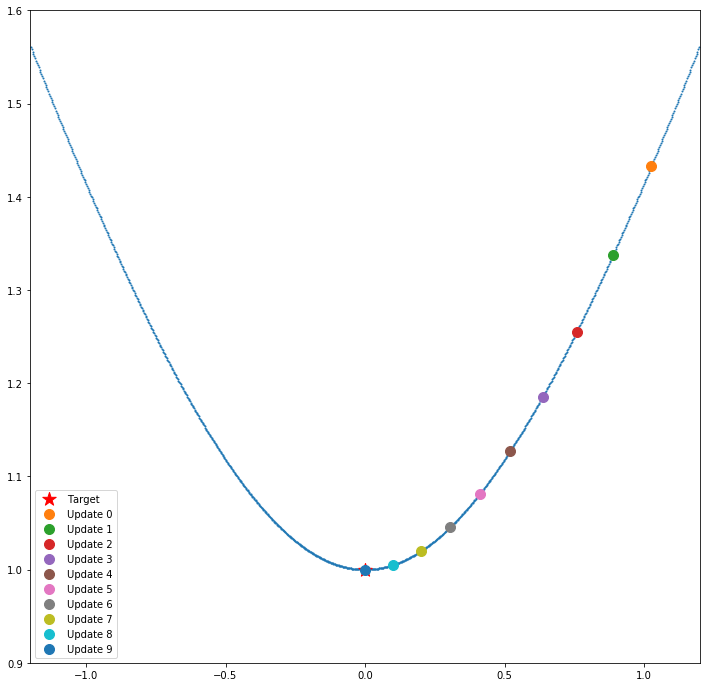

In [25]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[0.9, 1.6])
ax.scatter(x0, x1, s=1)
ax.scatter(target[0], target[1], color='r', marker='*',s=200,label = "Target")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
ax.legend()

In [26]:
updated_pts = [np.array([0., 1.])]
for i in range(1,10):
    updated_pts.append(
        gradient_descent( 
                         updated_pts[i-1], 
                         target,
                         error_differential_eucl, 
                         geometry="hyperbolic", 
                         learning_rate=0.1
                        )
    )
#    print("updated_pt = ", updated_pts[i])
#    print("-"*80)
print(updated_pts)


step = [0. 0.]
project_to_tangent: point_on_manifold = [0. 1.], displacement = [0. 0.], geometry = hyperbolic
project_to_tangent: xp_norm = 0.0, xx_norm = -1.0
projection on tangent space =  [0. 0.]
exponential_map: norm_v_tan =  0.0
step = [0. 0.]
project_to_tangent: point_on_manifold = [0. 1.], displacement = [0. 0.], geometry = hyperbolic
project_to_tangent: xp_norm = 0.0, xx_norm = -1.0
projection on tangent space =  [0. 0.]
exponential_map: norm_v_tan =  0.0
step = [0. 0.]
project_to_tangent: point_on_manifold = [0. 1.], displacement = [0. 0.], geometry = hyperbolic
project_to_tangent: xp_norm = 0.0, xx_norm = -1.0
projection on tangent space =  [0. 0.]
exponential_map: norm_v_tan =  0.0
step = [0. 0.]
project_to_tangent: point_on_manifold = [0. 1.], displacement = [0. 0.], geometry = hyperbolic
project_to_tangent: xp_norm = 0.0, xx_norm = -1.0
projection on tangent space =  [0. 0.]
exponential_map: norm_v_tan =  0.0
step = [0. 0.]
project_to_tangent: point_on_manifold = [0. 1.], 

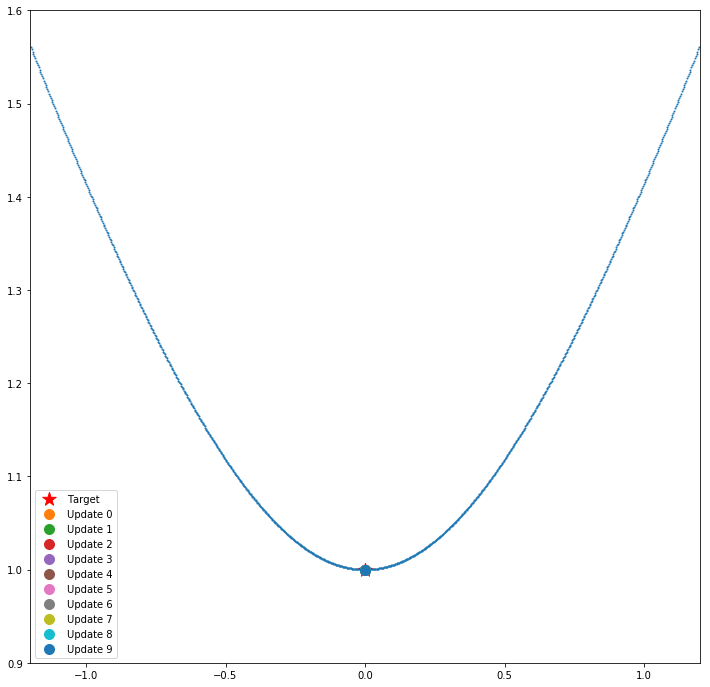

In [10]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[0.9, 1.6])
ax.scatter(x0, x1, s=1)
ax.scatter(target[0], target[1], color='r', marker='*',s=200,label = "Target")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
ax.legend()

In [11]:
updated_pts = [initial_point]
for i in range(1,10):
    updated_pts.append(
        gradient_descent( 
                         updated_pts[i-1], 
                         target,
                         error_differential_eucl, 
                         geometry="hyperbolic", 
                         learning_rate=0.18
                        )
    )
    print("****xhi =", np.arcsinh(updated_pts[i][0]))


    print("updated_pt = ", updated_pts[i])
    print("-"*80)
print(updated_pts)


u = [1.02651673 1.43308639], v = [0. 1.], u.v = -1.4330863854487743
step = [-0.         -0.97416825]
project_to_tangent: point_on_manifold = [1.02651673 1.43308639], displacement = [-0.         -0.97416825], geometry = hyperbolic
project_to_tangent: xp_norm = 1.3960672530300118, xx_norm = -1.0
projection on tangent space =  [1.43308639 1.02651673]
exponential_map: norm_v_tan =  0.17999999999999994
****xhi = 0.7200000000000001
updated_pt =  [0.78384048 1.27059273]
--------------------------------------------------------------------------------
u = [0.78384048 1.27059273], v = [0. 1.], u.v = -1.2705927333019296
step = [-0.         -1.27576979]
project_to_tangent: point_on_manifold = [0.78384048 1.27059273], displacement = [-0.         -1.27576979], geometry = hyperbolic
project_to_tangent: xp_norm = 1.6209838226402558, xx_norm = -0.9999999999999997
projection on tangent space =  [1.27059273 0.78384048]
exponential_map: norm_v_tan =  0.18000000000000008
****xhi = 0.5399999999999999
update

In [12]:
updated_pts = [initial_point]
for i in range(1,10):
    updated_pts.append(
        gradient_descent( 
                         updated_pts[i-1], 
                         target,
                         error_differential_eucl, 
                         geometry="hyperbolic", 
                         learning_rate=0.17
                        )
    )
    print("****xhi =", np.arcsinh(updated_pts[i][0]))


    print("updated_pt = ", updated_pts[i])
    print("-"*80)
print(updated_pts)


u = [1.02651673 1.43308639], v = [0. 1.], u.v = -1.4330863854487743
step = [-0.         -0.97416825]
project_to_tangent: point_on_manifold = [1.02651673 1.43308639], displacement = [-0.         -0.97416825], geometry = hyperbolic
project_to_tangent: xp_norm = 1.3960672530300118, xx_norm = -1.0
projection on tangent space =  [1.43308639 1.02651673]
exponential_map: norm_v_tan =  0.16999999999999998
****xhi = 0.73
updated_pt =  [0.79658581 1.2784948 ]
--------------------------------------------------------------------------------
u = [0.79658581 1.2784948 ], v = [0. 1.], u.v = -1.2784947988821622
step = [-0.         -1.25535754]
project_to_tangent: point_on_manifold = [0.79658581 1.2784948 ], displacement = [-0.         -1.25535754], geometry = hyperbolic
project_to_tangent: xp_norm = 1.6049680835025524, xx_norm = -0.9999999999999993
projection on tangent space =  [1.2784948  0.79658581]
exponential_map: norm_v_tan =  0.17000000000000015
****xhi = 0.5599999999999997
updated_pt =  [0.589

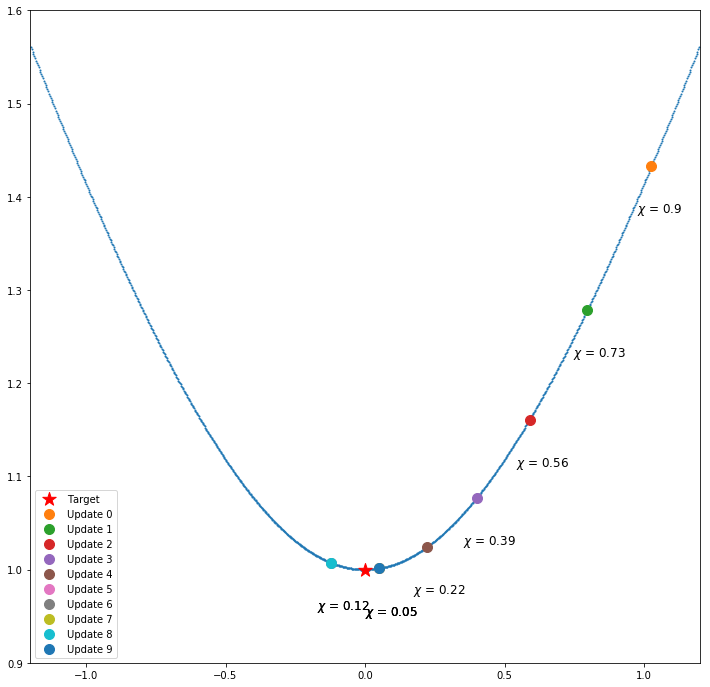

In [13]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[0.9, 1.6])
ax.scatter(x0, x1, s=1)
ax.scatter(target[0], target[1], color='r', marker='*',s=200,label = "Target")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
    ax.annotate("$\chi$ = {:.3g}".format(np.arccosh(pt[1])), xy=pt, 
                xytext=pt-(0.05,0.05), fontsize=12)

ax.legend()

Oscillates. Why does $\chi$ step down in units of learning rate?
## Test with spherical coordinates

In [14]:
target2 = np.array([0., -1.])
initial_pt2 = np.array([1., 0.])
updated_pts = [initial_pt2]
for i in range(1,10):
    updated_pts.append(
        gradient_descent(updated_pts[i-1], 
                         target2, 
                         error_differential_eucl, 
                         geometry="spherical", 
                         learning_rate=0.2
                        )

    )
print(updated_pts)

u = [1. 0.], v = [ 0. -1.], u.v = 0.0
step = [-0.  1.]
project_to_tangent: point_on_manifold = [1. 0.], displacement = [-0.  1.], geometry = spherical
project_to_tangent: xp_norm = 0.0, xx_norm = 1.0
projection on tangent space =  [-0.  1.]
exponential_map: norm_v_tan =  0.2
u = [ 0.98006658 -0.19866933], v = [ 0. -1.], u.v = 0.19866933079506122
step = [-0.          1.02033884]
project_to_tangent: point_on_manifold = [ 0.98006658 -0.19866933], displacement = [-0.          1.02033884], geometry = spherical
project_to_tangent: xp_norm = -0.2027100355086725, xx_norm = 1.0
projection on tangent space =  [0.19866933 0.98006658]
exponential_map: norm_v_tan =  0.20000000000000004
u = [ 0.92106099 -0.38941834], v = [ 0. -1.], u.v = 0.3894183423086505
step = [-0.          1.08570443]
project_to_tangent: point_on_manifold = [ 0.92106099 -0.38941834], displacement = [-0.          1.08570443], geometry = spherical
project_to_tangent: xp_norm = -0.4227932187381619, xx_norm = 1.0
projection on tange

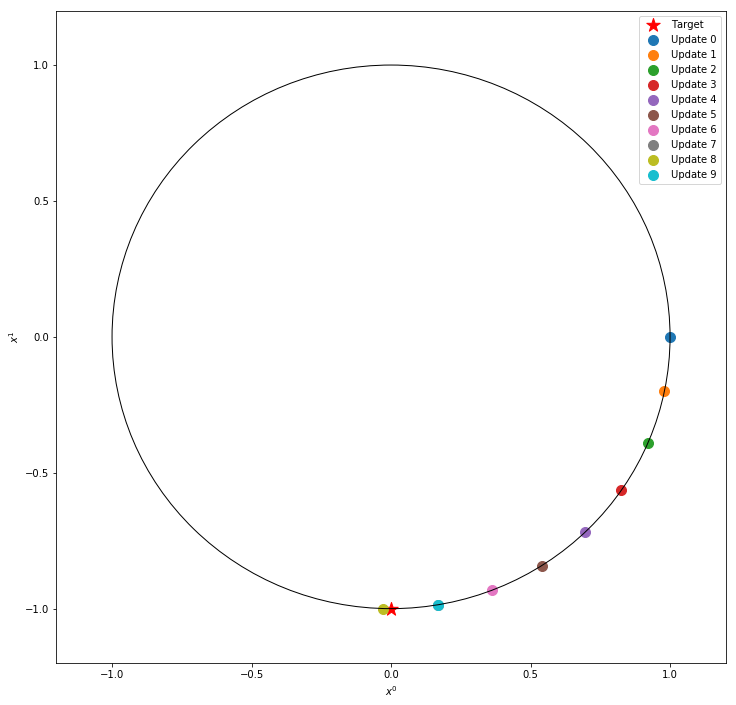

In [15]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
ax.scatter(target2[0], target2[1], color='r', marker='*',s=200,label = "Target")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
ax.legend()

Solution seems to oscillate, but why? pt_N = pt_{N-2}, although pt_{N-1} was closer.

In [16]:
target2 = np.array([0., -1.])
initial_pt2 = np.array([np.cos(0.49*np.pi), np.sin(0.49*np.pi)])
updated_pts = [initial_pt2]
for i in range(1,8):
    updated_pts.append(
        gradient_descent(updated_pts[i-1], 
                         target2, 
                         error_differential_eucl, 
                         geometry="spherical", 
                         learning_rate=.8
                        )
    )
    print("****theta =", np.arctan2(updated_pts[i][0], updated_pts[i][1]))
print(updated_pts)

u = [0.03141076 0.99950656], v = [ 0. -1.], u.v = -0.9995065603657316
step = [-0.         31.83622521]
project_to_tangent: point_on_manifold = [0.03141076 0.99950656], displacement = [-0.         31.83622521], geometry = spherical
project_to_tangent: xp_norm = 31.820515953775725, xx_norm = 1.0000000000000002
projection on tangent space =  [-0.99950656  0.03141076]
exponential_map: norm_v_tan =  0.800000000000047
****theta = 0.8314159265359473
u = [0.73888621 0.67383023], v = [ 0. -1.], u.v = -0.673830227298802
step = [-0.          1.35338837]
project_to_tangent: point_on_manifold = [0.73888621 0.67383023], displacement = [-0.          1.35338837], geometry = spherical
project_to_tangent: xp_norm = 0.9119539953800536, xx_norm = 0.9999999999999958
projection on tangent space =  [-0.67383023  0.73888621]
exponential_map: norm_v_tan =  0.7999999999999986
****theta = 1.631415926535947
u = [ 0.99816319 -0.06058248], v = [ 0. -1.], u.v = 0.060582479725725724
step = [-0.          1.00184019]
p

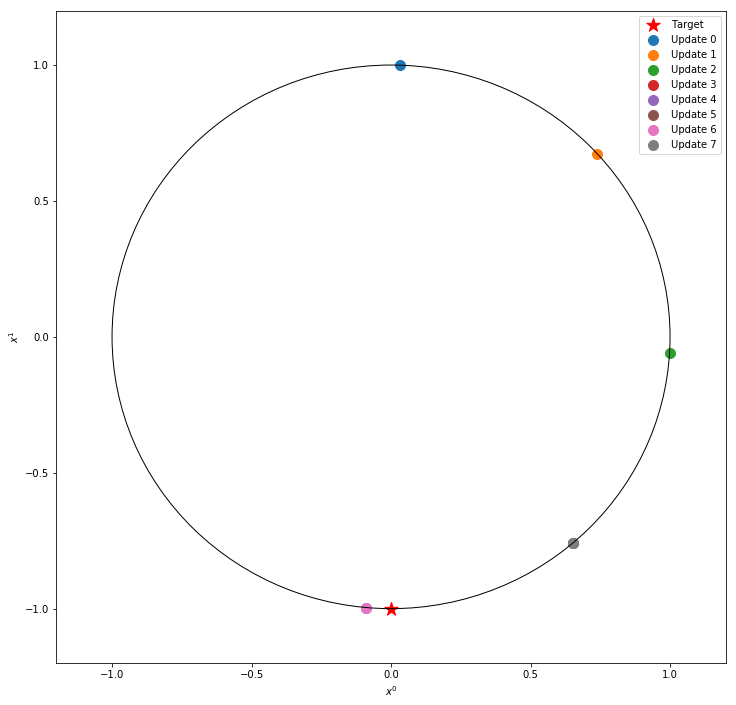

In [17]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
ax.scatter(target2[0], target2[1], color='r', marker='*',s=200,label = "Target")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
ax.legend()

Same oscillatory behaviour.